In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score

In [2]:
import ipywidgets as widgets
import io
import os
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [3]:
X_train = []
y_train = []
image_size = 150

In [4]:
train_path = 'Training'
labels = os.listdir(train_path)
print(labels)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [5]:
for i in labels:
    folder_path = os.path.join(train_path, i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.resize(img, (image_size, image_size))
        
        X_train.append(img)
        y_train.append(i)

In [6]:
test_path = 'Testing'

In [7]:
for i in labels:
    folder_path = os.path.join(test_path, i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.resize(img, (image_size, image_size))
        
        X_train.append(img)
        y_train.append(i)

In [8]:
X_train[1]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [9]:
y_train[1]

'glioma_tumor'

In [10]:
# X_train.shape, y_train.shape
len(X_train), len(y_train)

(3264, 3264)

In [11]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [12]:
#end of 1
X_train.shape, y_train.shape

((3264, 150, 150, 3), (3264,))

In [13]:
X_train[1]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [14]:
y_train[1]

'glioma_tumor'

In [15]:
X_train, y_train = shuffle(X_train, y_train, random_state = 99)
X_train.shape, y_train.shape

((3264, 150, 150, 3), (3264,))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.1, random_state = 100)

In [17]:
y_train[:5]

array(['meningioma_tumor', 'meningioma_tumor', 'pituitary_tumor',
       'meningioma_tumor', 'meningioma_tumor'], dtype='<U16')

In [18]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))

y_train_new[:5]

[1, 1, 3, 1, 1]

In [19]:
y_train_new = tf.keras.utils.to_categorical(y_train_new)
y_train_new

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [20]:
#end of 2
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))

y_test_new = tf.keras.utils.to_categorical(y_test_new)
y_test_new

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [21]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (image_size, image_size, 3)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(4, activation = 'softmax'))

In [22]:
model.summary() # param -editable paramaters

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [23]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [24]:
hist = model.fit(X_train, y_train_new, epochs = 20, validation_split = 0.1)

Epoch 1/20
83/83 [==============================] - 485s 6s/step - loss: 1.7842 - accuracy: 0.3004 - val_loss: 1.3609 - val_accuracy: 0.3878
Epoch 2/20
83/83 [==============================] - 504s 6s/step - loss: 1.1540 - accuracy: 0.4775 - val_loss: 1.0812 - val_accuracy: 0.6224
Epoch 3/20
83/83 [==============================] - 503s 6s/step - loss: 0.9456 - accuracy: 0.5933 - val_loss: 0.8477 - val_accuracy: 0.6531
Epoch 4/20
83/83 [==============================] - 506s 6s/step - loss: 0.8335 - accuracy: 0.6489 - val_loss: 0.7358 - val_accuracy: 0.7177
Epoch 5/20
83/83 [==============================] - 23709s 289s/step - loss: 0.7358 - accuracy: 0.6916 - val_loss: 0.8059 - val_accuracy: 0.6701
Epoch 6/20
83/83 [==============================] - 306s 4s/step - loss: 0.6511 - accuracy: 0.7329 - val_loss: 0.6976 - val_accuracy: 0.7279
Epoch 7/20
83/83 [==============================] - 301s 4s/step - loss: 0.5542 - accuracy: 0.7662 - val_loss: 0.5682 - val_accuracy: 0.8095
Epoch 8/2

In [25]:
model.save("Brain_Tumor_Image_Classification_Model.h5")

In [26]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy'] 
#end of 3

In [27]:

import matplotlib.pyplot as plt
import seaborn as sns


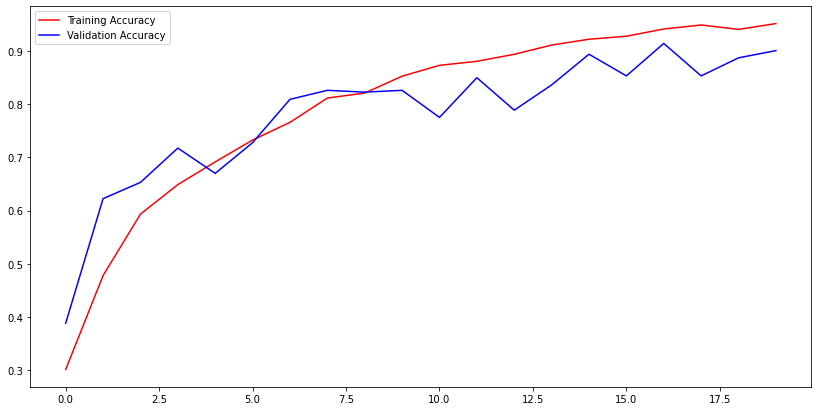

In [28]:
epochs = range(len(acc))
fig = plt.figure(figsize = (14,7))
plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.legend(loc = 'upper left')
plt.show()

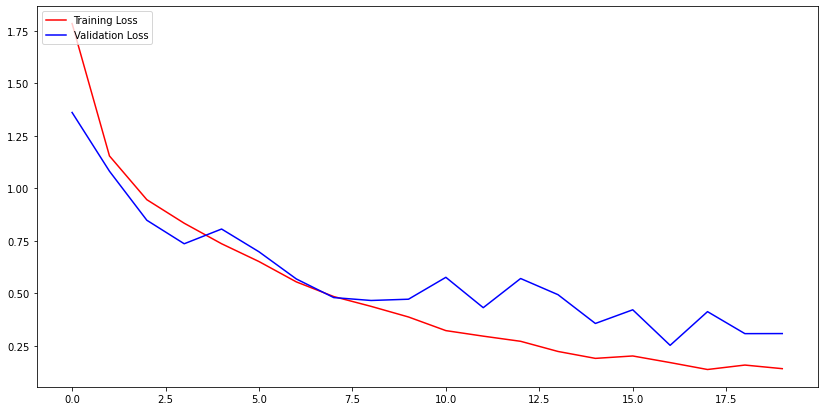

In [29]:
loss = hist.history['loss']
val_loss = hist.history['val_loss'] 

epochs = range(len(acc))
fig = plt.figure(figsize = (14,7))
plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.legend(loc = 'upper left')
plt.show()

In [30]:
img_path = 'Testing/glioma_tumor/image(4).jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (150, 150))
img_array = np.array(img)

img_array.shape

(150, 150, 3)

In [31]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

In [32]:
from tensorflow.keras.preprocessing import image

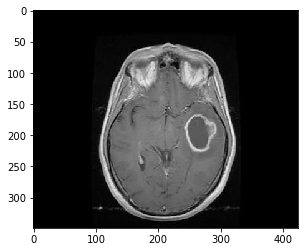

In [33]:
img = image.load_img(img_path)
plt.imshow(img, interpolation = 'nearest')
plt.show()

In [34]:
a = model.predict(img_array)
print(a)

1/1 [==============================] - 0s 207ms/step
[[9.2584485e-01 2.9334847e-02 4.4816252e-02 4.0381465e-06]]


In [35]:
indices = a.argmax()
indices

0

In [36]:
labels[indices]

'glioma_tumor'

In [37]:
from IPython.display import display,clear_output

In [38]:
def img_pred(upload, output):
    for name, file_info in upload.value.items():
        img = Image.open(io.BytesIO(file_info['content']))
        
        # Check if the image is a valid MRI image
        if img.mode != 'RGB':
            output.value = 'Invalid image'
            return
        
        opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
        img = cv2.resize(opencvImage, (150, 150))
        img = img.reshape(1, 150, 150, 3)
        p = model.predict(img)
        p = np.argmax(p,axis=1)[0]

       
        
        if p == 0:
                p = 'Glioma Tumor'
        elif p == 1:
                p = 'Meningioma Tumor'
        elif p == 2:
                p = 'No Tumor'
        else:
                p = 'Pituitary Tumor'
                
        output.value = f'The model predicts that it is a {p}'
    
# Define the file uploader widget
uploader = widgets.FileUpload(accept='.jpg,.jpeg,.png', multiple=True)
uploader_widget = widgets.Box([widgets.Label('Upload an image:'), uploader])
uploader_widget.layout.margin = '10px'
uploader_widget.layout.padding = '10px'
uploader_widget.layout.border = '2px solid #cccccc'
uploader_widget.layout.border_radius = '5px'
uploader_widget.layout.width = '500px'

# Define the output text box
output = widgets.Textarea(value='', description='Prediction:', disabled=True)
output_widget = widgets.Box([output])
output_widget.layout.margin = '10px'
output_widget.layout.padding = '10px'
output_widget.layout.border = '2px solid #cccccc'
output_widget.layout.border_radius = '5px'
output_widget.layout.width = '500px'

# Define the prediction button
button = widgets.Button(description='Predict', button_style='info')
button.layout.margin = '10px'
button.layout.width = '100px'
button.style.button_color = '#6c5ce7' # make button purple
button.style.font_weight = 'bold'
button.style.font_size = '16px'
button.style.border_radius = '5px'
button.style.border_color = '#3b8bed'
button.style.border_width = '2px'

# Define the event handler for the button
def on_button_click(button):
    img_pred(uploader, output)

# Attach the event handler to the button
button.on_click(on_button_click)

# Define the logo image
logo_image = widgets.Image(value=open('logo.png', 'rb').read(), format='png', width=30, height = 30)

# Define the header box
header_box = widgets.HBox([logo_image, widgets.Label('Brain Tumor Classifier', 
                                                     style={'font-weight': 'bold', 'font-size': '32pt'})])
header_box.layout.margin = '10px'

# Define the footer box
footer_box = widgets.HBox([widgets.Label('Made with ❤️ by Students of DSATM', style={'font-size': '14pt'})])
footer_box.layout.margin = '10px'

# Define the main box
main_box = widgets.VBox([header_box, uploader_widget, button, output_widget, footer_box])
main_box.layout.align_items = 'center'
main_box.layout.justify_content = 'center'
main_box.layout.background_color = '#f5f5f5'

# Display the widgets in a vertical box layout
display(main_box)
